<a href="https://colab.research.google.com/github/Saraldedv/CCDATSCL_EXERCISE_COM222/blob/main/Exercise4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4

This exercise focuses on data visualization and interpretation using a real-world COVID-19 dataset. The dataset contains daily records of confirmed cases, deaths, recoveries, and active cases across countries and regions, along with temporal and geographic information.
The goal of this exercise is not only to create charts, but to choose appropriate visualizations, apply correct data aggregation, and draw meaningful insights from the data. You will work with time-based, categorical, numerical, and geographic variables, and you are expected to think critically about how design choices affect interpretation.

Your visualizations should follow good practices:
- Use clear titles, axis labels, and legends
- Choose chart types appropriate to the data and question
- Avoid misleading scales or cluttered designs
- Clearly explain patterns, trends, or anomalies you observe

Unless stated otherwise, you may filter, aggregate, or group the data as needed.

<img src="https://d3i6fh83elv35t.cloudfront.net/static/2020/03/Screen-Shot-2020-03-05-at-6.29.29-PM-1024x574.png"/>

In [327]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("imdevskp/corona-virus-report")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'corona-virus-report' dataset.
Path to dataset files: /kaggle/input/corona-virus-report


In [328]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [330]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [331]:
df.query("`Country/Region` == 'Philippines'")

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
180,NaN,Philippines,12.879721,121.774017,2020-01-22,0,0,0,0,Western Pacific
441,NaN,Philippines,12.879721,121.774017,2020-01-23,0,0,0,0,Western Pacific
702,NaN,Philippines,12.879721,121.774017,2020-01-24,0,0,0,0,Western Pacific
963,NaN,Philippines,12.879721,121.774017,2020-01-25,0,0,0,0,Western Pacific
1224,NaN,Philippines,12.879721,121.774017,2020-01-26,0,0,0,0,Western Pacific
...,...,...,...,...,...,...,...,...,...,...
47943,NaN,Philippines,12.879721,121.774017,2020-07-23,74390,1871,24383,48136,Western Pacific
48204,NaN,Philippines,12.879721,121.774017,2020-07-24,76444,1879,24502,50063,Western Pacific
48465,NaN,Philippines,12.879721,121.774017,2020-07-25,78412,1897,25752,50763,Western Pacific
48726,NaN,Philippines,12.879721,121.774017,2020-07-26,80448,1932,26110,52406,Western Pacific


In [332]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## A. Time-Based Visualizations

1. Global Trend `(5 pts)`

Aggregate the data by Date and create a line chart showing the global number of confirmed COVID-19 cases over time.

In [333]:
df['Date'] = pd.to_datetime(df['Date'])

In [334]:
df_global = df.groupby("Date")["Confirmed"].sum().reset_index()
df_global

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


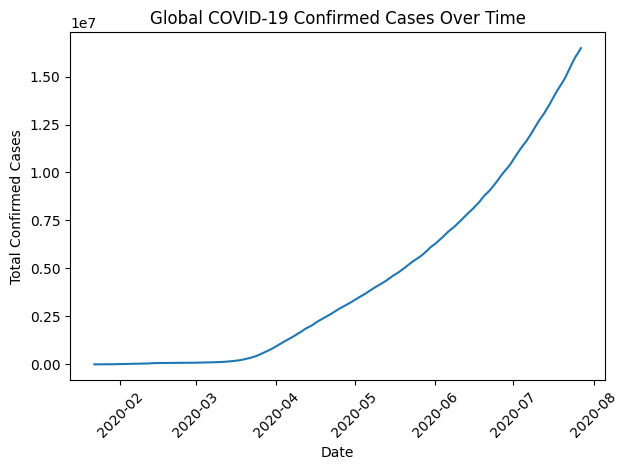

In [335]:
plt.figure()
plt.plot(df_global['Date'], df_global['Confirmed'])
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.title('Global COVID-19 Confirmed Cases Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


2. Country-Level Trends `(5 pts)`

Select three countries and visualize their confirmed case counts over time on the same plot.

In [336]:
print(df['Country/Region'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Greenland' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Guatemala'
 'Guinea' 'Guyana' 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'South Korea' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Liberia' 

In [337]:
highest_confirmed = (
    df.groupby('Country/Region')['Confirmed']
    .sum()
    .reset_index()
    .sort_values(by='Confirmed', ascending=False)
)

print(highest_confirmed)

            Country/Region  Confirmed
173                     US  224345948
23                  Brazil   89524967
138                 Russia   45408411
79                   India   40883464
157                  Spain   27404045
..                     ...        ...
140  Saint Kitts and Nevis       1772
68               Greenland       1507
75                Holy See       1356
130       Papua New Guinea       1185
183         Western Sahara        901

[187 rows x 2 columns]


In [338]:
countries = ['US', 'Brazil', 'Botswana']

In [339]:
df_selected = df[df['Country/Region'].isin(countries)]

df_countries = (
    df_selected
    .groupby(['Date', 'Country/Region'])['Confirmed']
    .sum()
    .reset_index()
)

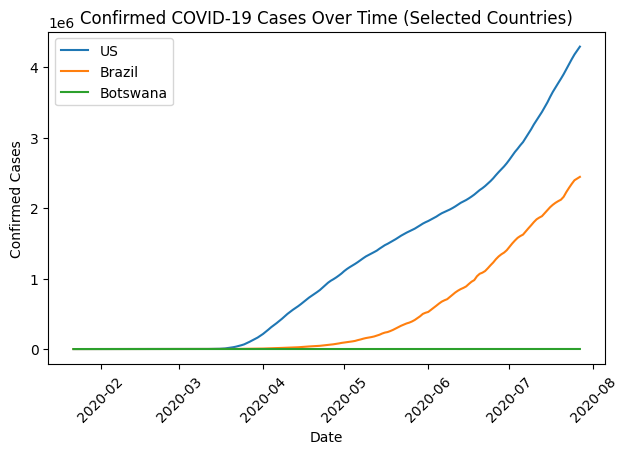

In [340]:
plt.figure()
for country in countries:
    country_data = df_countries[df_countries['Country/Region'] == country]
    plt.plot(country_data['Date'], country_data['Confirmed'], label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Confirmed COVID-19 Cases Over Time (Selected Countries)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


3. Active vs Recovered `(5 pts)`

For a selected country, create a line chart showing Active and Recovered cases over time.

In [341]:
denmark_df = df[df['Country/Region'] == 'Denmark']

In [342]:
denmark_trend = (denmark_df.groupby('Date')[['Active', 'Recovered']].sum().reset_index())

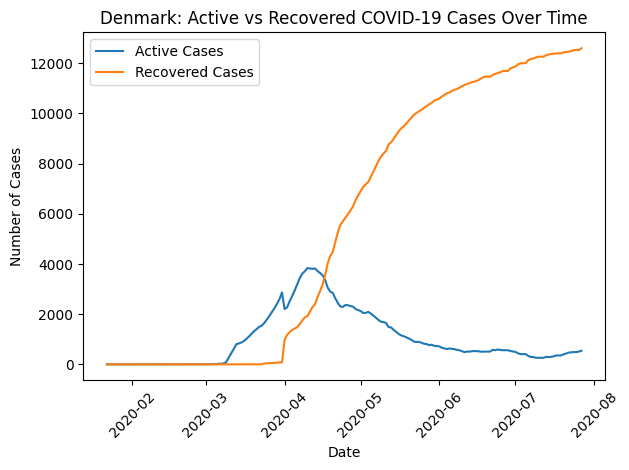

In [343]:
plt.figure()
plt.plot(denmark_trend['Date'], denmark_trend['Active'], label='Active Cases')
plt.plot(denmark_trend['Date'], denmark_trend['Recovered'], label='Recovered Cases')

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Denmark: Active vs Recovered COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## B: Comparative Visualizations

4. Country Comparison `(5 pts)`

Using data from a single date, create a bar chart showing the top 10 countries by confirmed cases.

In [344]:
selected_date = df['Date'].max()

In [345]:
df_date = df[df['Date'] == selected_date]

In [346]:
top10 = (df_date.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10).reset_index())

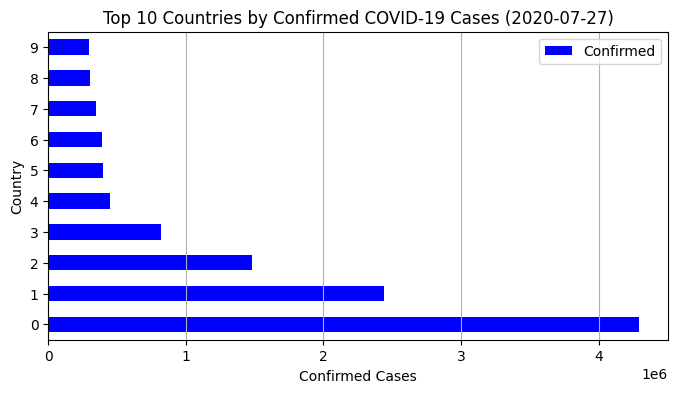

In [347]:
top10.plot(kind="barh", figsize=(8, 4),color="blue")
plt.title(f"Top 10 Countries by Confirmed COVID-19 Cases ({selected_date.date()})")
plt.xlabel("Confirmed Cases")
plt.ylabel("Country")
plt.grid(axis="x")
plt.show()

5. WHO Region Comparison `(5 pts)`

Aggregate confirmed cases by WHO Region and visualize the result using a bar chart.

In [348]:
WHO_region = df.groupby("WHO Region")["Confirmed"].sum()

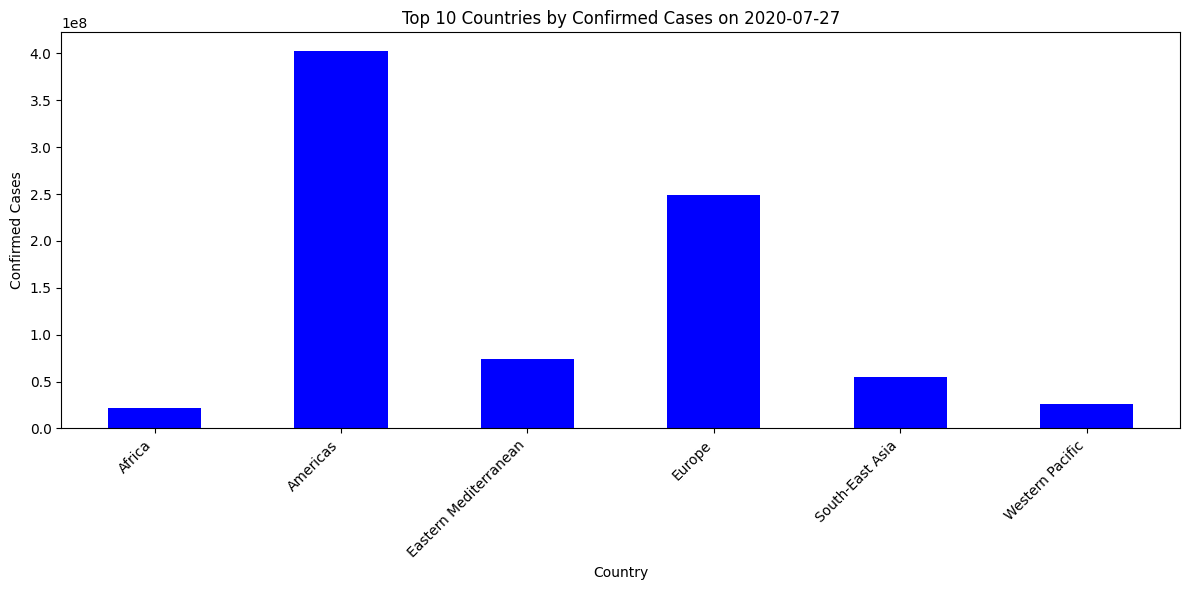

In [349]:
plt.figure(figsize=(12, 6))
WHO_region.plot(kind="bar", color="blue")

plt.title("Top 10 Countries by Confirmed Cases on 2020-07-27")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## C. Geographic Visualization

6. Geographic Spread `(10 pts)`

Using Latitude and Longitude, create a map-based visualization showing confirmed cases for a selected date.

In [350]:
import plotly.express as px


selected_date = df['Date'].max()


date_data = df[df['Date'] == selected_date]


country_confirmed = (
    date_data
    .groupby('Country/Region')['Confirmed']
    .sum()
    .reset_index()
)

# Create choropleth map
fig = px.choropleth(
    country_confirmed,
    locations='Country/Region',
    locationmode='country names',
    color='Confirmed',
    projection="natural earth",
    title=f'Confirmed COVID-19 Cases on {selected_date.date()}'
)

fig.show()

7. Regional Clustering `(15 pts)`

Create a visualization that shows how confirmed cases are distributed geographically within a single WHO Region.

In [351]:
df["Date"] = pd.to_datetime(df["Date"])

# Select the date to visualize
target_who = "Europe"
df_who = df[df["WHO Region"] == target_who]


agg = df_who.groupby("Country/Region", as_index=False)["Confirmed"].sum()

fig = px.choropleth(
    agg,
    locations="Country/Region",
    locationmode="country names",
    color="Confirmed",
    hover_name="Country/Region",
    color_continuous_scale="Viridis",
    projection="natural earth",
    title=f"Confirmed COVID-19 Cases on {target_who}"
)

fig.show()